In [95]:
import pandas as pd
import numpy as np
from sklearn.impute import MissingIndicator
import matplotlib.pyplot as plt

df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [96]:
# Clean data frame
df = df.drop(columns=["island", "culmen_length_mm", "culmen_depth_mm", "sex"]).dropna() 
df

,species,flipper_length_mm,body_mass_g
0,Adelie,181.0,3750.0
1,Adelie,186.0,3800.0
2,Adelie,195.0,3250.0
4,Adelie,193.0,3450.0
5,Adelie,190.0,3650.0
...,...,...,...
338,Gentoo,214.0,4925.0
340,Gentoo,215.0,4850.0
341,Gentoo,222.0,5750.0
342,Gentoo,212.0,5200.0


In [105]:
adelie_full  = df[df.species == 'Adelie']
gentoo_full  = df[df.species == 'Gentoo']
сhinstrap_full = df[df.species == 'Chinstrap']
#adelies = adelie_full.shape[0]
#gentoos = gentoo_full.shape[0]
#print('Cleaned dataframe: ', adelies, gentoos)
#
#if adelies > gentoos:
#    adelie_full = adelie_full.drop(adelie_full.tail(adelies - gentoos).index)
#elif gentoos > adelies:
#    gentoo_full = gentoo_full.drop(gentoo_full.tail(gentoos - adelies).index)
#print('Aligned dataframe:',  adelie_full.shape[0], gentoo_full.shape[0])   

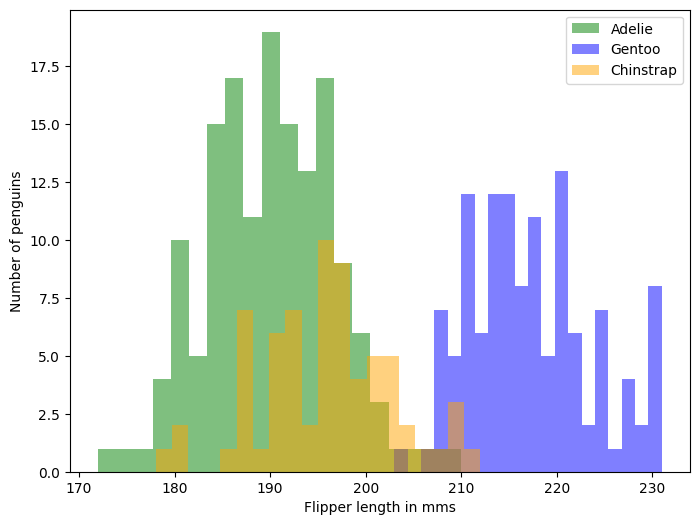

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(adelie_full.flipper_length_mm, bins=20, color='green', alpha=0.5, label='Adelie')
ax.hist(gentoo_full.flipper_length_mm, bins=20, color='blue', alpha=0.5, label='Gentoo')
ax.hist(сhinstrap_full.flipper_length_mm, bins=20, color='orange', alpha=0.5, label='Chinstrap')
ax.set_xlabel('Flipper length in mms')
ax.set_ylabel('Number of penguins')
ax.legend()
plt.show()

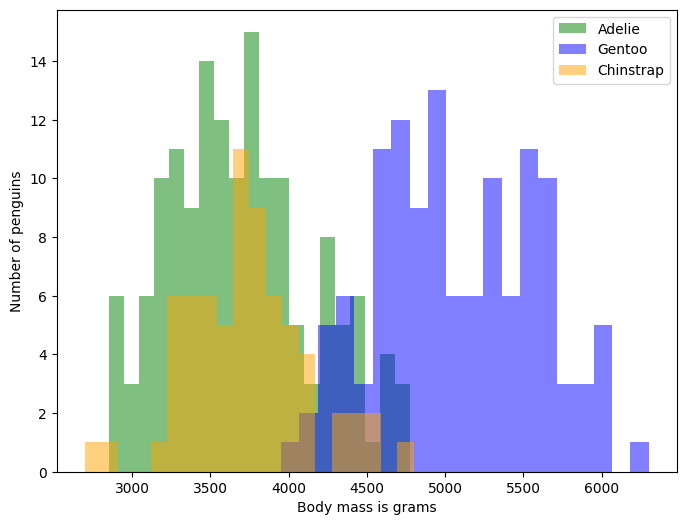

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(adelie_full.body_mass_g, bins=20, color='green', alpha=0.5, label='Adelie')
ax.hist(gentoo_full.body_mass_g, bins=20, color='blue', alpha=0.5, label='Gentoo')
ax.hist(сhinstrap_full.body_mass_g, bins=20, color='orange', alpha=0.5, label='Chinstrap')
ax.set_xlabel('Body mass is grams')
ax.set_ylabel('Number of penguins')
ax.legend()
plt.show()

Text(0, 0.5, 'Body mass in grams')

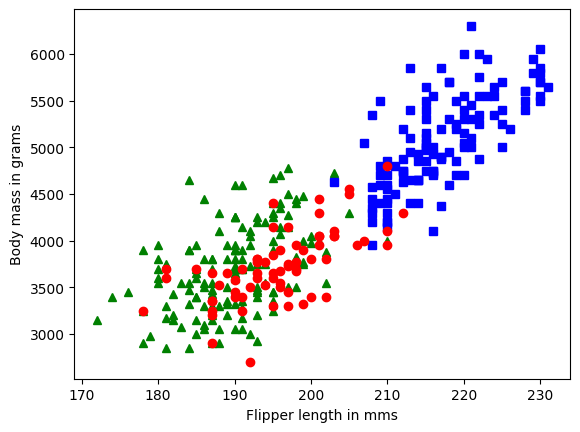

In [114]:
plt.plot(adelie_full.flipper_length_mm, adelie_full.body_mass_g, 'g^',\
         gentoo_full.flipper_length_mm, gentoo_full.body_mass_g, 'bs',\
         сhinstrap_full.flipper_length_mm, сhinstrap_full.body_mass_g,'ro')

plt.xlabel('Flipper length in mms')
plt.ylabel('Body mass in grams')

68
68


Text(0, 0.5, 'Body mass in grams')

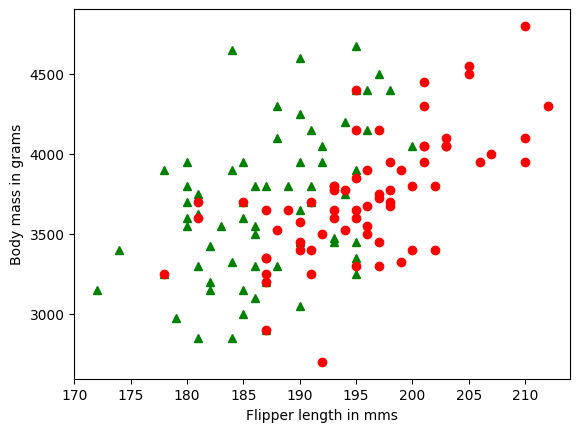

In [236]:
adelie_full = adelie_full.drop(adelie_full.tail(adelie_full.shape[0] - сhinstrap_full.shape[0]).index)

print(adelie_full.shape[0])
print(сhinstrap_full.shape[0])

plt.plot(adelie_full.flipper_length_mm, adelie_full.body_mass_g, 'g^',\
         сhinstrap_full.flipper_length_mm, сhinstrap_full.body_mass_g,'ro')

plt.xlabel('Flipper length in mms')
plt.ylabel('Body mass in grams')

In [237]:
# Prepare train and test data 
from sklearn.model_selection import train_test_split

features = np.concatenate((adelie_full.drop(columns=['species']).to_numpy(),\
                           сhinstrap_full.drop(columns=['species']).to_numpy()), axis=0)
print(len(features))

species = np.concatenate(([0] * adelie_full.shape[0],
                          [1] * сhinstrap_full.shape[0]), axis=0)
print(len(species))

features_train, features_test, species_train, species_test = train_test_split(features, species, test_size=0.1)

136
136


Accuracy: 0.71
[[0.8198759  0.1801241 ]
 [0.72224349 0.27775651]
 [0.8534275  0.1465725 ]
 [0.37476782 0.62523218]
 [0.43873137 0.56126863]
 [0.82936132 0.17063868]
 [0.56520644 0.43479356]
 [0.6817732  0.3182268 ]
 [0.37466696 0.62533304]
 [0.83637199 0.16362801]
 [0.05658598 0.94341402]
 [0.3366224  0.6633776 ]
 [0.22986902 0.77013098]
 [0.86275657 0.13724343]]


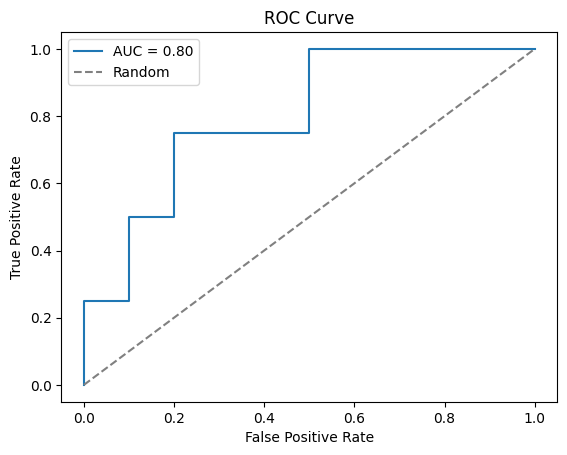

In [238]:
# Out-of-box classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

gnb = GaussianNB()
gnb.fit(features_train, species_train)

species_pred = gnb.predict(features_test)
accuracy = accuracy_score(species_test, species_pred)
print(f"Accuracy: {accuracy:.2f}")

species_proba  = gnb.predict_proba(features_test)
print(species_proba)

fpr, tpr, thresholds = roc_curve(species_test, species_proba[:, 1])
auc_score = roc_auc_score(species_test, species_proba[:, 1])

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Accuracy: 0.71
------- [[1.53778689e-05 3.37845009e-06]
 [2.45928532e-05 9.45774499e-06]
 [1.09021562e-05 1.87238784e-06]
 [3.67366516e-06 6.12886266e-06]
 [1.71545218e-05 2.19457657e-05]
 [1.19086546e-05 2.45015689e-06]
 [2.21606042e-05 1.70473524e-05]
 [1.95134329e-05 9.10813101e-06]
 [7.96873109e-06 1.33001335e-05]
 [1.22375777e-05 2.39414873e-06]
 [6.79169690e-07 1.13234201e-05]
 [1.48995425e-05 2.93624019e-05]
 [1.76762256e-06 5.92211023e-06]
 [9.42300016e-06 1.49896036e-06]]


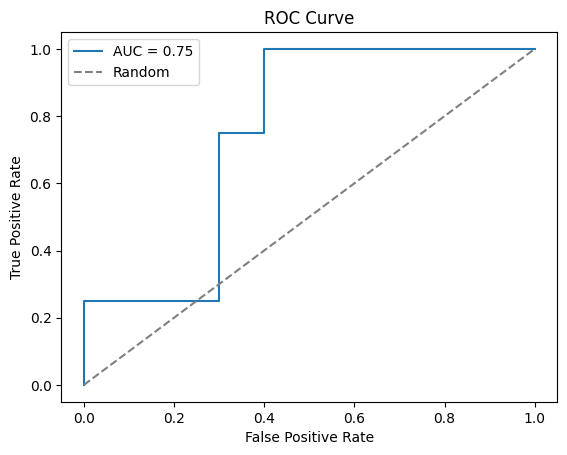

In [244]:
# In-house classifier
import math

class InHouseGNB:
    def _separate_by_classes(self, x, y):
        classes_index = {}
        x_separated = {}
        cls, counts = np.unique(y, return_counts=True)
        self.sum = sum(counts) 
        self.class_freq = dict(zip(cls, counts))
        for class_type in self.class_freq:
            classes_index[class_type] = np.argwhere(y==class_type)
            x_separated[class_type] = x[classes_index[class_type], :]
        return x_separated
    
    def likelyhood(x, mean, stdev):
        return np.exp(-0.5*((x - mean)/ stdev)**2)/(np.sqrt(2*np.pi)*stdev)
    
    def _predict_proba_for_one(self, x):
        class_prob = dict()
        for cls in self.class_freq:
            class_prob[cls] = math.log(self.class_freq[cls] / float(self.sum))
            for i in range(self.x_features):
                class_prob[cls] += math.log(InHouseGNB.likelyhood(x[i], self.means[cls][i],\
                                                                        self.std[cls][i]))              
        class_prob = {cls: math.e ** class_prob[cls] for cls in class_prob}
        
        return class_prob
    
    def predict_proba(self, x):
        res = np.zeros((0, len(self.class_freq)))
        for x_i in x:
            prob_for_single = self._predict_proba_for_one(x_i)
            prob_for_single = [prob_for_single[i] for i in prob_for_single]   
            res = np.vstack((res, prob_for_single))
        print(res)    
        return res              
    
    def predict(self, X):
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0.0
            for cls, prob in self._predict_proba_for_one(x).items():
                if prob > max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred

    
    def fit(self, x, y):
        assert(len(x) == len(y))
        separated_X = self._separate_by_classes(x, y)
        self.x_features = x.shape[1]
        self.means = {}
        self.std = {}
        for class_type in self.class_freq:
            self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
            self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]
        return self
    

ihgnb = InHouseGNB()

ihgnb.fit(features_train, species_train)

species_pred = ihgnb.predict(features_test)
accuracy = accuracy_score(species_test, species_pred)
print(f"Accuracy: {accuracy:.2f}")

species_proba  = ihgnb.predict_proba(features_test)

fpr, tpr, thresholds = roc_curve(species_test, species_proba[:, 1])
auc_score = roc_auc_score(species_test, species_proba[:, 1])

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
